__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.4　季節成分が複数ある場合の予測モデル

## 3.4.1　MSTLで複数の季節成分を分解

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import numpy as np
import pandas as pd

import statsmodels.api as sm

import rpy2
%load_ext rpy2.ipython

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ

In [11]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset = sm.datasets.get_rdataset(
    "taylor", "forecast")

print(dataset.data) #確認

          x
0     22262
1     21756
2     22247
3     22759
4     22549
...     ...
4027  27946
4028  27133
4029  25996
4030  24610
4031  23132

[4032 rows x 1 columns]


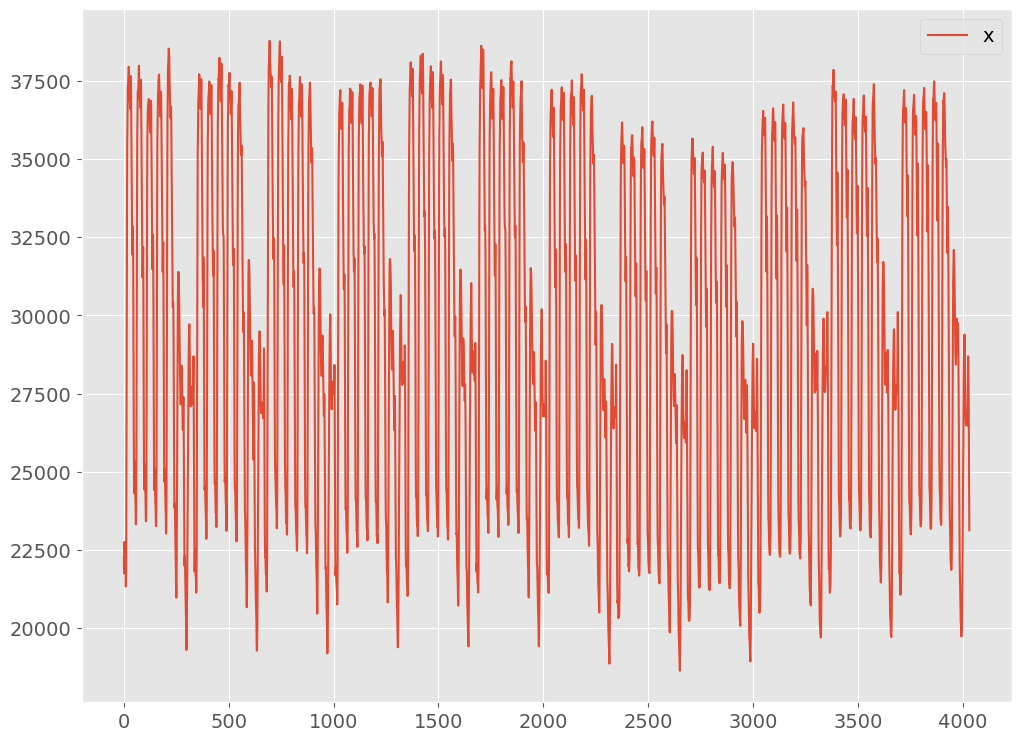

In [3]:
#
# 時系列データのグラフ化（折れ線グラフ）
#

dataset.data.plot()
plt.show()

### RのMSTLで分解

In [8]:
# R環境からPython環境へオブジェクトを渡す

y = dataset.data.x #R環境に渡すデータをyに格納
%R -i y #yをR環境に渡す
print(y)

0       22262
1       21756
2       22247
3       22759
4       22549
        ...  
4027    27946
4028    27133
4029    25996
4030    24610
4031    23132
Name: x, Length: 4032, dtype: int64


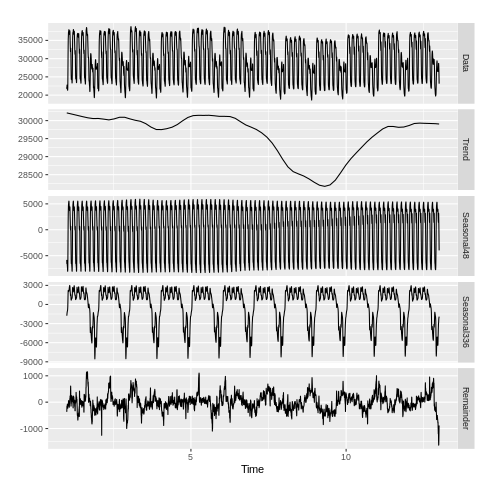

In [9]:
%%R

# Rのforecastライブラリーの読み込み
library(forecast)

# 時系列オブジェクトに変換
y = msts(y, seasonal.periods=c(48,336)) 

# MSTLで分解
y_mstl = mstl(y)             

# グラフ化
autoplot(y_mstl)                        

### Python環境でグラフ表示

In [6]:
# Python環境からR環境へオブジェクトを渡す

%R -o y_mstl

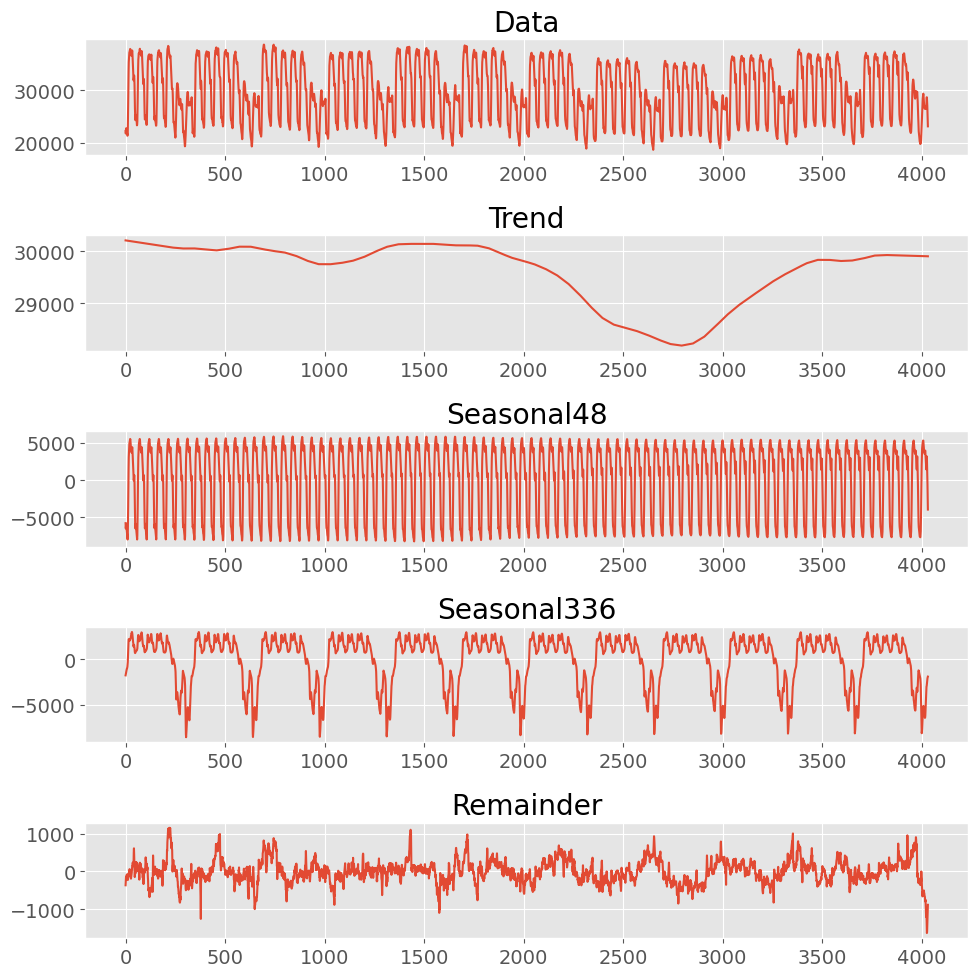

In [7]:
#
# グラフ表示
#

fig, ax = plt.subplots(5,1, figsize=[10,10])

# グラフの描写
ax[0].plot(y_mstl[:,0]) #Data
ax[1].plot(y_mstl[:,1]) #Trend
ax[2].plot(y_mstl[:,2]) #Seasonal48
ax[3].plot(y_mstl[:,3]) #Seasonal336
ax[4].plot(y_mstl[:,4]) #Remainder

# 各グラフのタイトル
ax[0].title.set_text('Data')
ax[1].title.set_text('Trend')
ax[2].title.set_text('Seasonal48')
ax[3].title.set_text('Seasonal336')
ax[4].title.set_text('Remainder')

fig.tight_layout()
plt.show()